# Numpy

[NumPy](https://numpy.org/), abreviação de *Numerical Python*, é um dos pacotes básicos mais importantes
para computação numérica em Python.

<ul>
<li>ndarray, uma matriz multidimensional eficiente que fornece operações aritméticas rápidas, orientadas vetores e recursos flexíveis. 
<li> Funções matemáticas para operações rápidas em matrizes de dados
 <span style="color:red">sem a necessidade de laços</span>.
<li>Ferramentas para ler/escrever dados vetoriais em disco e trabalhar com arquivos maeados na memória.
<li>Algebra Linear, geração e números aleatórios, transformada de Fourier, etc.
 </ul>   

Um dos principais recursos do **NumPy** é seu objeto de matriz N-dimensional, ou **ndarray**, que é um contêiner rápido e flexível para grandes conjuntos de dados em Python. 
- **ndarray** permitem que você execute operações matemáticas em blocos inteiros de dados usando uma sintaxe semelhante às operações equivalentes entre os elementos escalares.

Para lhe dar uma ideia da diferença de desempenho, considere um vetor NumPy de um
milhões de inteiros e a lista Python equivalente:

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

Vamos multiplicar ambas as sequencias por 2

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 76.9 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.87 s


> Algoritmos baseados em **NumPy** são geralmente de 10 a 100 vezes mais rápidos (ou mais) do que seus equivalentes Python puros e usam significativamente menos memória.

In [6]:
data = np.random.randn(2, 3)

In [7]:
data

array([[ 0.2207896 , -0.79675443,  1.07558261],
       [ 2.15498844, -0.41713382,  0.60803552]])

In [8]:
data * 10

array([[ 2.207896  , -7.96754431, 10.75582609],
       [21.54988442, -4.1713382 ,  6.08035524]])

In [9]:
data + data

array([[ 0.4415792 , -1.59350886,  2.15116522],
       [ 4.30997688, -0.83426764,  1.21607105]])

Um **ndarray** é um contêiner multidimensional genérico para dados homogêneos; isso é todos
os elementos devem ser do mesmo tipo. 
- Cada array tem uma forma (**shape**), uma tupla indicando o tamanho de cada dimensão 
- e um **dtype**, um objeto que descreve o tipo de dados da matriz:

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

# Criando ndarrays

A maneira mais fácil de criar um array é usar a função **array**. Essa função aceita qualquer
objeto semelhante a uma sequência (incluindo outras matrizes) e produz uma nova matriz NumPy contendo os dados passados. Por exemplo, convertendo uma lista.

In [12]:
data1 = [1,2,4,6]

In [13]:
arr1 = np.array(data1)

In [14]:
arr1

array([1, 2, 4, 6])

Além de **np.array**, há uma série de outras funções para a criação de novas
matrizes. 
- Como exemplos, **zeros** e **ones** criam matrizes de 0s ou 1s, respectivamente, com um dado comprimento ou forma. 
- **empty** cria uma matriz sem inicializar seus valores. 

- Para criar uma matriz de mais alta dimensão com esses métodos, passe uma tupla para a forma.

In [15]:
np.zeros(4)

array([0., 0., 0., 0.])

In [16]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [17]:
np.empty((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

**arange** é a versão da função **range** do Python

In [18]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Você pode produzir intervalos de ponto flutuante com espaçamento uniforme com a função **linspace** do NumPy. 
- Os primeiros dois argumentos da função especificam os valores inicial e final no intervalo, e o valor final é incluído na matriz. 
- O argumento opcional da palavra-chave **num** especifica o número de valores espaçados uniformemente a serem produzidos - o valor padrão deste argumento é 50:

In [37]:
np.linspace(0.0, 1.0, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Você pode converter explicitamente um vetor de um **dtype** para outro usando o método **astype**


In [38]:
arr = np.array([1, 2, 3, 4, 5])

In [39]:
arr

array([1, 2, 3, 4, 5])

In [40]:
arr.dtype

dtype('int32')

In [41]:
float_arr = arr.astype(np.float64)

In [42]:
float_arr.dtype

dtype('float64')

# Aritmética com NumPy Arrays

Os **arrays** são importantes porque permitem expressar operações em lote nos dados
sem escrever nenhum for laço. 
- Os usuários do NumPy chamam isso de <font color=red>vetorização</font>. 
- <font color=blue>Qualquer operação aritmética entre matrizes de tamanhos iguais aplica-se a operação elemento a elemento</font>

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [20]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [21]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [22]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

As operações aritméticas com escalares propagam o argumento escalar para cada elemento na matriz

In [47]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparações entre **arrays** de mesmo tamanho retorna um valor booleano.

In [48]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [49]:
arr > arr2

array([[ True, False,  True],
       [False,  True, False]])

As operações entre matrizes de tamanhos diferentes são chamadas de transmissão (*broadcasting*).

# Indexação e cortes básicos

Os arrays unidimensionais são simples; superficialmente, eles agem de forma semelhante às listas do Python:

In [23]:
arr = np.arange(10)

In [24]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
arr[5]

5

In [26]:
arr[5:8]

array([5, 6, 7])

In [27]:
arr[5:8] = 11

In [28]:
arr

array([ 0,  1,  2,  3,  4, 11, 11, 11,  8,  9])

Como você pode ver, se você atribuir um valor escalar a uma fatia, como em **`arr[5: 8] = 11`**, o valor é propagado (ou transmitido daqui em diante) para toda a seleção. 
- Uma importante primeira distinção das listas integradas do Python é que **fatias da matriz são visualizações na matriz original**.
- Isso significa que os dados não são copiados e quaisquer modificações na visualização serão refletido na matriz de origem. 

In [29]:
    arr_slice = arr[5:8]

In [30]:
arr_slice

array([11, 11, 11])

In [31]:
arr_slice[1] = 12

In [32]:
arr

array([ 0,  1,  2,  3,  4, 11, 12, 11,  8,  9])

O corte `[:]` atribui a todos os valores no *array*

In [33]:
arr_slice[:] = 13

In [34]:
arr

array([ 0,  1,  2,  3,  4, 13, 13, 13,  8,  9])

Se você deseja *copiar uma fatica* de um ndarray ao invés de criar uma visão, você precisa copiar explicitamente o array, **`arr[5:8].copy()`**.

Com **matrizes de dimensões maiores**, você tem muito mais opções. 
- Em um array bidimensional, os elementos em cada índice não são mais escalares, mas sim arrays unidimensionais :

In [35]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [36]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
arr2d[2]

array([7, 8, 9])

Assim, os elementos individuais podem ser acessados recursivamente. Mas isso é trabalho demais. Então você pode passar uma lista de índices separados por vírgulas para selecionar elementos individuais.
Portanto, são equivalentes:

In [38]:
arr2d[1][1]

5

In [39]:
arr2d[1,1]

5

<font color=blue>eixo 0 como as “linhas” e eixo 1 como as “colunas” da matriz</font>

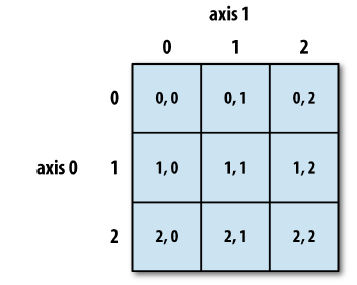

Em matrizes multidimensionais, se você omitir os índices posteriores, o objeto retornado será um **ndarray** de dimensão inferior que consiste em todos os dados ao longo das dimensões superiores. Então na matriz 2 × 2 × 3 *arr3d*

In [40]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [41]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
arr3d[0,0,2]

3

Ambos os valores escalares e matrizes podem ser atribuídos

In [44]:
old_values = arr3d[0].copy()

In [45]:
arr3d[0] = 20

In [46]:
arr3d

array([[[20, 20, 20],
        [20, 20, 20]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0] = old_values

In [48]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

**Indexando com cortes**

Como objetos unidimensionais, como listas Python, **ndarrays** podem ser divididos com o
sintaxe familiar:

In [49]:
arr

array([ 0,  1,  2,  3,  4, 13, 13, 13,  8,  9])

In [50]:
arr[1:6]

array([ 1,  2,  3,  4, 13])

Considere a matriz bidimensional anterior, arr2d. Cortar esta matriz é um pouco
diferente:

In [51]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Como você vê, a matriz foi cortada ao longo do eixo 0, o primeiro eixo. 
- Um corte (fatia), portanto, seleciona um intervalo de elementos ao longo de um eixo. 
- Pode ser útil ler a expressão *`arr2d[: 2]`* como: **"Selecione as duas primeiras linhas de arr2d."**

In [53]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [54]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [55]:
arr2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

**:1** seleciona a primeira linha; **1:** seleciona desde a primeira linha - **_de_ : _para_**
<font color=red>Indices de corte (slicing) são diferentes de indices de array. Eles começam em 1 ao invés de 0!</font>

Ao fatiar assim, você sempre obtém visualizações de matriz com o mesmo número de dimensões.
Ao **misturar índices inteiros e fatias**, você obtém cortes dimensionais menores.
- Por exemplo, posso selecionar a segunda linha, mas apenas as duas primeiras colunas, desta forma:

In [56]:
arr2d[1,:2]

array([4, 5])

Da mesma forma, posso selecionar a terceira coluna, mas apenas as duas primeiras linhas, desta forma:

In [57]:
arr2d[:2, 2]

array([3, 6])

Observe que os dois pontos, por si só, significa pegar todo o
eixo, então você pode cortar eixos de dimensão superior fazendo:

In [58]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Claro, atribuindo a uma expressão de corte, atribui-se a toda a seleção:

In [59]:
arr2d[:2, 2:] = 0

In [60]:
arr2d

array([[1, 2, 0],
       [4, 5, 0],
       [7, 8, 9]])

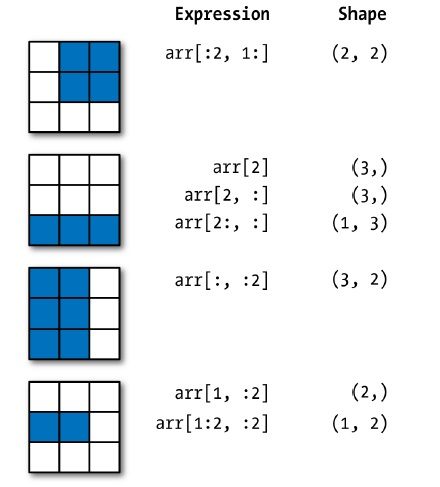

**Indexação Boolena**

Vamos considerar um exemplo onde temos alguns dados em uma matriz e uma matriz de nomes
com duplicatas. 
- Vamos usar aqui a função **randn** de **numpy.random** para gerar alguns dados aleatórios normalmente distribuídos

In [61]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [62]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [63]:
data = np.random.randn(7, 4)

In [64]:
data

array([[-1.66577737,  0.11172978,  0.74687297, -0.59060351],
       [ 0.48207748,  0.90627217,  0.33780873, -1.53100242],
       [ 0.88052988,  1.39804892, -1.779034  ,  1.96768029],
       [ 0.01627029,  0.57784584,  0.81780275,  0.04682134],
       [-0.93563807,  0.13839903, -0.28318975,  0.76649702],
       [-0.33460402,  0.27431114, -0.85221072,  1.13393703],
       [-1.07854665,  0.20357395,  0.7413942 ,  0.51762354]])

Suponha que cada nome corresponda a uma linha na matriz de dados e queremos selecionar
todas as linhas com o nome correspondente 'Bob'. Como operações aritméticas, comparações
(como ==) com matrizes também são vetorizadas. Assim, comparando nomes com o
string 'Bob' produz uma matriz booleana:

In [65]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

Este array booleano pode ser passado na indexação do array

In [66]:
data[names == 'Bob']

array([[-1.66577737,  0.11172978,  0.74687297, -0.59060351],
       [ 0.01627029,  0.57784584,  0.81780275,  0.04682134]])

A matriz booleana deve ter o mesmo comprimento do eixo da matriz que está indexando. Você pode
até mesmo misturar e combine arrays booleanos com cortes ou inteiros.

Os conectores lógicos podem ser usados, por exemplo, **~**(não). 
- Palavras-chave Python **and** e **or** não funcionam com matrizes booleanas.
    - Use **&** (e) e **|** (ou) em vez disso.
A indexação booleana é uma boa maneira de criar **máscaras**

Definir valores com matrizes booleanas funciona de maneira sensata. Para definir todos os
valores negativos nos dados para 0, precisamos apenas fazer:

In [67]:
data[data < 0] = 0

In [68]:
data

array([[0.        , 0.11172978, 0.74687297, 0.        ],
       [0.48207748, 0.90627217, 0.33780873, 0.        ],
       [0.88052988, 1.39804892, 0.        , 1.96768029],
       [0.01627029, 0.57784584, 0.81780275, 0.04682134],
       [0.        , 0.13839903, 0.        , 0.76649702],
       [0.        , 0.27431114, 0.        , 1.13393703],
       [0.        , 0.20357395, 0.7413942 , 0.51762354]])

Definir linhas ou colunas inteiras usando uma matriz booleana unidimensional também é fácil:

In [69]:
data[names != 'Joe'] = 7

In [99]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.07321325, 0.71810601, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.60024501, 0.44398612],
       [0.        , 0.        , 2.30115579, 0.        ]])

#### Indexação elegante (Fancy indexing)

A indexação elegante é um termo adotado pelo NumPy para descrever a indexação usando arrays de inteiros. Suponha que tenhamos uma matriz 8 × 4:

In [70]:
arr = np.empty((8, 4))

In [71]:
for i in range(8):
    arr[i] = i

In [72]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Para selecionar um subconjunto de linhas em uma ordem específica, você pode simplesmente passar uma lista ou um **ndarray** de inteiros especificando a ordem desejada:

In [73]:
# Selecionando linhas da matriz em uma determinada ordem
arr[[3, 1, 4, 0]]

array([[3., 3., 3., 3.],
       [1., 1., 1., 1.],
       [4., 4., 4., 4.],
       [0., 0., 0., 0.]])

O uso de índices negativos seleciona linhas a partir do fim:

In [74]:
# Selecionando linhas da matriz em uma determinada ordem decrescente
arr[[-3,-1,-5]]

array([[5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [3., 3., 3., 3.]])

Passar várias matrizes de índice faz algo um pouco diferente; seleciona uma matriz unidimensional e elementos correspondentes a cada tupla de índices:

In [75]:
arr = np.arange(32).reshape((8, 4))

In [76]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [77]:
# Pegando coordenadas da matriz anterior, ou seja, (1,0) (5,3) (7,1) e (2,2)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Neste exemplo, os elementos (1, 0), (5, 3), (7, 1), e (2, 2) foram selecionados. Independentemente de quantas dimensões a matriz tem (aqui, apenas 2), o resultado da indexação elegante é sempre unidimensional.

Lembre-se de que a indexação elegante, ao contrário do corte, sempre copia os dados em um novo array.

## Transpondo arrays e trocando eixos

A transposição é uma forma especial de remodelagem que retorna uma visão da base
dados sem copiar nada. Matrizes têm o método **transpose** e também o atributo especial **T**.

In [78]:
arr = np.arange(15).reshape((3, 5))

In [79]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [80]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

Ao fazer cálculos de matriz, você pode fazer isso com muita frequência, por exemplo, quando
computar o produto interno usando **np.dot**

In [81]:
arr = np.random.randn(6, 3)

In [82]:
arr

array([[ 1.47356556, -0.11325208,  0.90593988],
       [-0.50741826,  1.00531924, -0.14015187],
       [ 1.48432274,  0.28959068,  0.05298171],
       [ 0.29617888,  0.63010889, -0.35884373],
       [-1.82271696, -0.22986323,  0.9577121 ],
       [-0.10292487,  1.10422298, -0.6298035 ]])

In [83]:
np.dot(arr.T, arr)

array([[ 8.05269532,  0.24479288, -0.30237819],
       [ 0.24479288,  2.77653829, -1.36985086],
       [-0.30237819, -1.36985086,  2.28581041]])

## Funções universais: Funções rápidas de array elemento a elemento

Uma função universal, ou **ufunc**, é uma função que executa operações de elemento a elemento em dados **ndarrays**. Você pode pensar nelas como funções que assumem um ou mais valores escalares e produzem um ou mais resultados escalares.

Muitas funções **ufuncs** são transformações simples, aplicada elemento a elemento, como **sqrt** ou **exp**:

In [84]:
arr = np.arange(18)

In [85]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [86]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
       3.87298335, 4.        , 4.12310563])

Essas são chamadas de **ufuncs** unárias. Outras, como **add** ou **maximum**, usam duas matrizes (portanto, **ufuncs** binárias) e retornam uma única matriz como resultado:

In [87]:
x = np.random.randn(8)

In [88]:
y = np.random.randn(8)

In [89]:
x

array([-0.04392491, -1.03298547,  1.71046289, -0.27366135,  0.37717909,
       -1.04045039, -0.19541384, -0.44842086])

In [90]:
y

array([-0.88135705,  0.81245209,  0.04860249, -1.40444183, -1.31329532,
        0.3338648 ,  0.15328909,  1.16119418])

In [91]:
np.maximum(x,y)

array([-0.04392491,  0.81245209,  1.71046289, -0.27366135,  0.37717909,
        0.3338648 ,  0.15328909,  1.16119418])

Embora não seja comum, uma **ufunc** pode retornar vários arrays. **modf** é um exemplo, uma versão vetorizada de **divmod** do Python; ela retorna a parte inteira e a parte fracionária de um array de ponto flutuante:

In [92]:
arr = np.random.randn(7) * 5

In [93]:
arr

array([-4.23827845, -2.11164055, 11.28823218, -3.69403382, -0.22647471,
       -4.36539218,  4.13819969])

In [94]:
remainder, whole_part = np.modf(arr)

In [95]:
remainder

array([-0.23827845, -0.11164055,  0.28823218, -0.69403382, -0.22647471,
       -0.36539218,  0.13819969])

In [96]:
whole_part

array([-4., -2., 11., -3., -0., -4.,  4.])

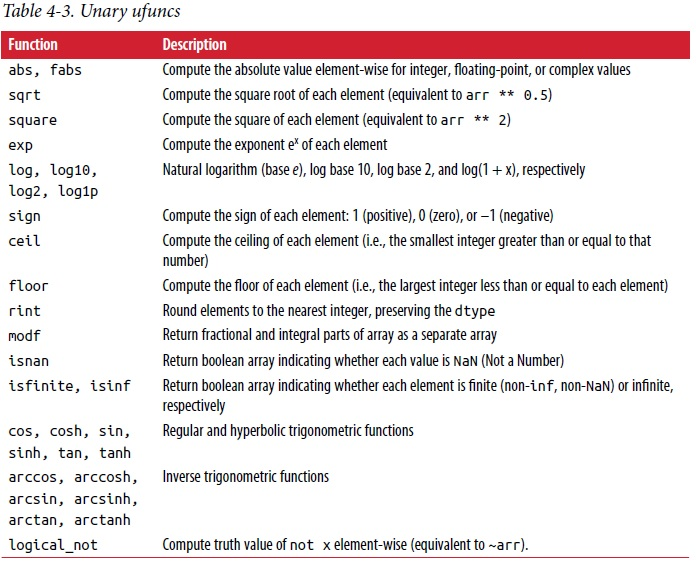

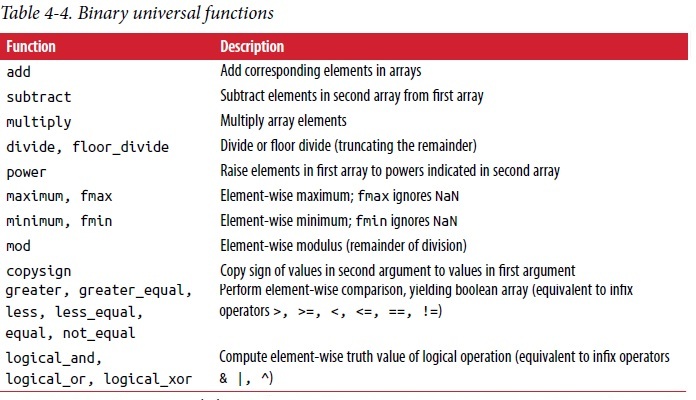

## Programação vetorial

Usar matrizes NumPy permite que você expresse muitos tipos de tarefas de processamento de dados como expressões vetoriais concisas que, de outra forma, exigira a escrita de laços.
- Esta prática de substituir laços explícitos por expressões vetoriais é comumente referida como **_vetorização_**.
- Em geral, as operações vetoriais geralmente são uma, duas (ou mais) ordem de magnitude mais rápidas do que seus equivalentes Python puros.

Como um exemplo simples, suponha que desejamos avaliar a função $sqrt(x^2 + y^2)$
através de uma grade regular de valores. A função **np.meshgrid** leva *dois arrays 1D* e
produz *duas matrizes 2D* correspondentes a todos os pares de (x, y) nas duas matrizes:

In [97]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [98]:
xs, ys = np.meshgrid(points, points)

In [99]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [106]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Agora, avaliar a função é uma questão de escrever a mesma expressão que escreveria com para dois pontos:

In [107]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [108]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Usando matplotlib para criar visualizações deste array bidimensional
array:

In [109]:
import matplotlib.pyplot as plt

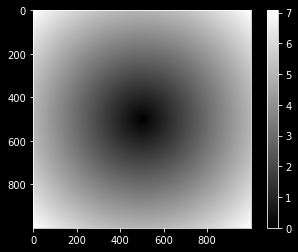

In [110]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

## Expressando lógica condicional como operações em arrays

A função **numpy.where** é uma versão vetorial da expressão ternária **x if con
dition else y**. Suponha que temos uma matriz booleana e duas matrizes de valores

In [111]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [112]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [113]:
cond = np.array([True, False, True, True, False])

Suponha que quiséssemos obter um valor de **xarr** sempre que o valor correspondente em
**cond** for **True** e, caso contrário, obtém o valor de **yarr**. Usando notação simplificada de lista temos:

In [114]:
result = [(x if c else y)
.....: for x, y, c in zip(xarr, yarr, cond)]

In [115]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Essa maneira apresenta alguns problemas. 
- Primeiro, não será muito rápido para grandes matrizes (porque todo o trabalho está sendo feito em código Python interpretado). 
- Em segundo lugar, não funcionará com matrizes multidimensionais. 
    - Com **np.where**, você pode escrever isso a mesma expressão de forma muito concisa:

In [143]:
result = np.where(cond, xarr, yarr)

In [144]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

O segundo e o terceiro argumentos para **np.where** não precisam ser matrizes; um ou ambos
deles podem ser escalares. 
- Um uso típico de **where** na análise de dados é produzir uma novo array de valores com base em outro. 
    - Suponha que você tenha uma matriz de dados gerada aleatoriamente e você deseja substituir todos os valores positivos por 2 e todos os valores negativos por -2. Isso é muito fácil de fazer com **np.where**:

In [116]:
arr = np.random.randn(4, 4)

In [117]:
arr

array([[-0.45473547,  0.313215  ,  0.71424166, -0.33017925],
       [-0.17737879, -0.29531175, -0.30489224, -0.8045977 ],
       [ 0.49484398, -0.99008127, -0.01803406,  0.99001524],
       [-0.28527228, -0.46602708, -0.15968268,  0.99023049]])

In [118]:
arr > 0

array([[False,  True,  True, False],
       [False, False, False, False],
       [ True, False, False,  True],
       [False, False, False,  True]])

In [119]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2, -2],
       [-2, -2, -2, -2],
       [ 2, -2, -2,  2],
       [-2, -2, -2,  2]])

Você pode combinar escalares e matrizes ao usar **np.where**. Por exemplo, podemos substituir
todos os valores positivos em **arr** com a constante 2 assim:

In [46]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.57479504,  2.        , -0.26920578,  2.        ],
       [-1.10180001, -2.21423562, -1.0512213 ,  2.        ],
       [-0.53502016,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.47735335,  2.        ]])

## Métodos matemáticos e estatísticos

Um conjunto de funções matemáticas que calculam estatísticas sobre uma matriz inteira ou sobre
os dados ao longo de um eixo são acessíveis como métodos da classe **array** e do módulo NumPy.

Aqui geramos alguns dados aleatórios normalmente distribuídos e calculamos algumas estatísticas descritivas:

In [120]:
arr = np.random.randn(5, 4)

In [121]:
arr

array([[-2.82032007, -0.05678729,  0.08360917,  0.17992026],
       [-2.23331561,  0.38913499,  1.63992287,  0.15567255],
       [-0.84965458, -0.7333131 ,  0.40382885,  0.13105095],
       [ 0.59064429, -0.74039492, -0.03893239, -2.41249181],
       [-0.83886697,  1.10180574,  1.16284904, -0.16175507]])

In [122]:
arr.mean()

-0.25236965469869954

In [123]:
np.mean(arr)

-0.25236965469869954

In [124]:
arr.sum()

-5.047393093973991

Funções como **mean** e **sum** usam um argumento de eixo opcional que calcula a estatística
sobre o eixo determinado, resultando em uma matriz com uma dimensão a menos:

In [125]:
arr.mean(axis=1)

array([-0.65339448, -0.0121463 , -0.26202197, -0.65029371,  0.31600819])

In [126]:
arr.sum(axis=0)

array([-6.15151294, -0.03955458,  3.25127754, -2.10760312])

Aqui, **arr.mean(axis=1)** significa “calcule a média das colunas” e **arr.sum(axis=0)**
significa “compute a soma das linhas.”

Outros métodos como **cumsum** e **cumprod** não agregam, em vez disso, produzem uma matriz
dos resultados intermediários:

In [127]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [128]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

Em matrizes multidimensionais, funções de acumulação como **cumsum** retornam uma matriz de mesmo tamanho, mas com os valores agregados parciais calculados ao longo do eixo indicado
de acordo com cada corte de dimensional inferior:

In [129]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [130]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [131]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [132]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

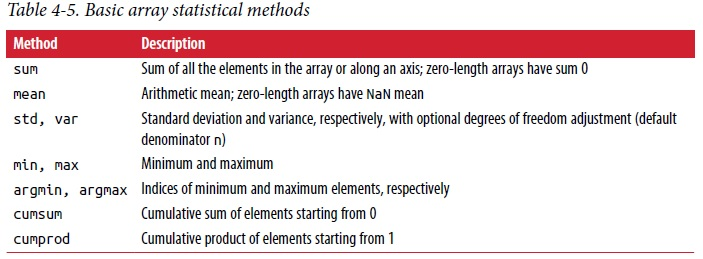

**Métodos para arrays Booleanos**

**sum** geralmente é usado como um meio de contar valores *True* em uma matriz booleana:

In [133]:
arr = np.random.randn(100)

In [134]:
(arr > 0).sum() # Number of positive values

58

Existem dois métodos adicionais, **any** e **all**, úteis especialmente para matrizes booleanas. 
- **any** testa se um ou mais valores em uma matriz são *True*,
- enquanto **all** verifica se todos os valores são verdadeiros:

In [135]:
bools = np.array([False, False, True, False])

In [136]:
bools.any()

True

In [137]:
bools.all()

False

Esses métodos também funcionam com matrizes não booleanas, onde elementos diferentes de zero avaliam para **True**.

## Ordenação

Como o tipo de lista do Python, matrizes NumPy podem ser ordenadas localmente com o
método **sort**

In [138]:
arr = np.random.randn(6)

In [139]:
arr

array([-1.96405271, -0.5251223 ,  0.38325083, -2.4704028 , -0.17293019,
        0.18414885])

In [140]:
arr.sort()

In [141]:
arr

array([-2.4704028 , -1.96405271, -0.5251223 , -0.17293019,  0.18414885,
        0.38325083])

Você pode ordenar cada seção unidimensional de valores em uma matriz multidimensional ao longo de um eixo, passando o número do eixo para ordenação:

In [142]:
arr = np.random.randn(5, 3)

In [143]:
arr

array([[ 5.26128583e-01,  2.48867089e+00,  2.33120698e-03],
       [-6.65037149e-01, -1.50022376e+00, -8.01380884e-01],
       [-1.76282607e-01, -1.74470851e+00, -9.18520032e-01],
       [ 1.95332528e-02, -2.30817124e+00, -8.57867995e-02],
       [ 1.00229617e+00, -9.75077223e-02,  5.62201909e-01]])

In [144]:
arr.sort(0)

In [145]:
arr

array([[-6.65037149e-01, -2.30817124e+00, -9.18520032e-01],
       [-1.76282607e-01, -1.74470851e+00, -8.01380884e-01],
       [ 1.95332528e-02, -1.50022376e+00, -8.57867995e-02],
       [ 5.26128583e-01, -9.75077223e-02,  2.33120698e-03],
       [ 1.00229617e+00,  2.48867089e+00,  5.62201909e-01]])

## Unique e outras operações de conjunto

NumPy tem algumas operações de conjunto básicas para **ndarrays** unidimensionais. 
- Um comumente usado é **np.unique**, que retorna os valores exclusivos ordenados de uma matriz:

In [146]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [147]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [148]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [149]:
np.unique(ints)

array([1, 2, 3, 4])

A função **np.in1d**, testa a pertinencia dos valores de uma matriz em outra,
retornando uma matriz booleana:

In [150]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [151]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

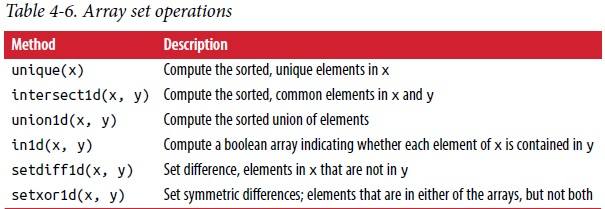

## Arquivos em NumPy

NumPy é capaz de salvar e carregar dados de e para o disco em formato de texto ou binário.
Aqui discutimos apenas o formato binário integrado do NumPy, já que a maioria dos usuários
prefire pandas e outras ferramentas para carregar texto ou dados tabulares.

**np.save** e **np.load** são as duas funções usadas para salvar e carregar com eficiência
dados da matriz no disco. As matrizes são salvas por padrão em um binário bruto descompactado
em formato com extensão de arquivo *.npy*:

In [152]:
arr = np.arange(10)

In [153]:
np.save('some_array', arr)

Se o caminho do arquivo ainda não terminar em .npy, a extensão será anexada. A matriz
no disco pode ser carregado com **np.load**:

In [154]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Você pode salvar *múltiplos arrays* em um arquivo descompactado usando **np.savez** e passando o arrays como argumentos

In [159]:
np.savez('array_archive.npz', a=arr, b=arr*2)

In [160]:
arch = np.load('array_archive.npz')

In [161]:
arch['b']

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [162]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Para obter maior compactação, você pode querer usar **numpy.savez_compressed**

## Algebra linear

Álgebra linear, como multiplicação de matrizes, decomposições, determinantes e outras operações 
matemática com matriz quadrada, é uma parte importante de qualquer biblioteca de array. 
- Ao contrário de algumas linguagens como o MATLAB, multiplicar dois arrays bidimensionais com * é uma ooperação elemento a elemento produto em vez de um produto de matrizes. 
- Para tanto, há a função **dot**, tanto como um método de array como de NumPy:

In [163]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [164]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [165]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [166]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [167]:
x.dot(y) # x.dot(y) is equivalent to np.dot(x, y):

array([[ 28.,  64.],
       [ 67., 181.]])

Um produto de matriz entre uma matriz bidimensional e uma matriz unidimensional de tamanho adequado resulta em um array unidimensional:

In [181]:
np.dot(x, np.ones(3))

array([ 6., 15.])

**numpy.linalg** tem um conjunto padrão de decomposições de matriz e funções como inversa
e determinante:

In [168]:
from numpy.linalg import inv, qr

In [169]:
X = np.random.randn(5, 5)

In [170]:
X

array([[ 1.43926582,  0.06478542,  1.25210727, -0.52141959, -0.79054994],
       [ 1.14456413, -0.08976029, -0.61829323, -0.54278785, -0.97026163],
       [-1.11430895, -1.25790962, -2.41391086,  2.15895722,  0.51301523],
       [-0.69917484, -0.5327873 , -1.03593372, -1.10126393, -1.19261916],
       [ 0.7118897 , -0.56177625,  0.21492926,  0.71495145,  0.99734395]])

In [171]:
mat = X.T.dot(X)

In [172]:
mat

array([[ 5.61883   ,  1.36479573,  4.66158614, -2.49851965, -1.27614744],
       [ 1.36479573,  2.19404554,  3.60428834, -2.51573595, -0.53432373],
       [ 4.66158614,  3.60428834,  8.89637803, -4.23430106, -0.17848736],
       [-2.49851965, -2.51573595, -4.23430106,  6.95153112,  4.07287334],
       [-1.27614744, -0.53432373, -0.17848736,  4.07287334,  4.24659687]])

In [173]:
inv(mat)

array([[ 0.50274316,  0.3491233 , -0.51301906, -0.24440549,  0.40785233],
       [ 0.3491233 ,  1.99458643, -0.81554854,  0.37008611, -0.03334229],
       [-0.51301906, -0.81554854,  0.93227243,  0.4926594 , -0.69010445],
       [-0.24440549,  0.37008611,  0.4926594 ,  1.12686094, -1.08693624],
       [ 0.40785233, -0.03334229, -0.69010445, -1.08693624,  1.36731671]])

In [174]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  3.96412588e-17, -2.12022134e-17,
        -2.15257632e-16,  1.92184681e-16],
       [ 3.68120465e-16,  1.00000000e+00, -6.00791044e-16,
        -3.33890823e-16,  1.07354042e-15],
       [ 5.55482065e-17, -1.09424255e-15,  1.00000000e+00,
        -2.18239040e-16,  1.10670760e-15],
       [ 2.07420990e-16,  1.15111382e-15,  2.14668180e-16,
         1.00000000e+00, -3.00096466e-16],
       [-1.56983561e-18, -6.29344213e-17, -6.25868441e-18,
        -6.23129500e-16,  1.00000000e+00]])

In [175]:
q, r = qr(mat)

In [176]:
r

array([[ -7.93948714,  -4.33682563, -10.50323139,   7.5290639 ,
          3.06407326],
       [  0.        ,  -2.73381973,  -4.21837161,   4.09809848,
          1.01846913],
       [  0.        ,   0.        ,  -1.92755191,  -4.057232  ,
         -4.67567016],
       [  0.        ,   0.        ,   0.        ,  -2.33892487,
         -2.00235344],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.52024906]])

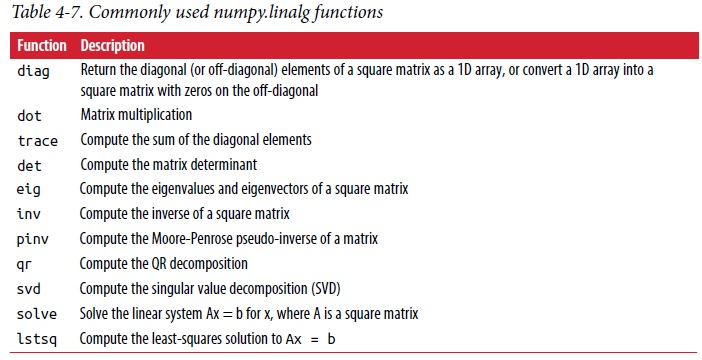

## Geração de números pseudoraleatórios

O módulo **numpy.random** complementa o módulo **random** do Python com funções
para gerar eficientemente matrizes de valores de amostra de muitos tipos de distribuições. Por exemplo, você pode obter uma matriz 4 × 4 de amostras com distribuição normal usando normal:

In [177]:
samples = np.random.normal(size=(4, 4))

In [178]:
samples

array([[-0.61597974,  1.12290837, -0.39829791, -0.57449198],
       [-1.01418003,  0.36585654, -1.0536815 ,  1.74861718],
       [ 0.6681369 ,  1.4976223 , -0.70296097, -0.25153172],
       [ 0.91098763, -0.51898521,  0.51475978,  3.44436649]])

Você pode alterar a semente de geração de número aleatório do NumPy usando
np.random.seed:

As funções de geração de dados em **numpy.random** usam uma semente aleatória global. Para evitar o estado global, você pode usar numpy.random.RandomState para criar um gerador de número aleatório isolado de outros: 

In [27]:
rng = np.random.RandomState(1234)

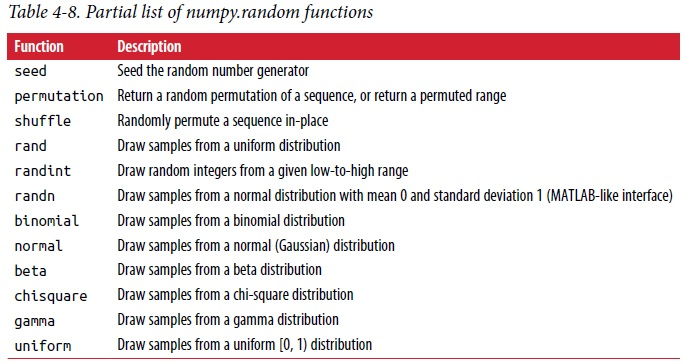

### Remodelando Vetores

Em muitos casos, você pode converter um vetor de uma forma para outra sem copiar
quaisquer dados. Para fazer isso, passe uma tupla indicando a nova forma para o método **reshape**.
- Por exemplo, suponha que tenhamos uma matriz unidimensional de valores que desejamos reorganizar em uma matriz

In [179]:
arr = np.arange(8)

In [180]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [181]:
arr.reshape((4, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

#### Ordem de remodelagem 

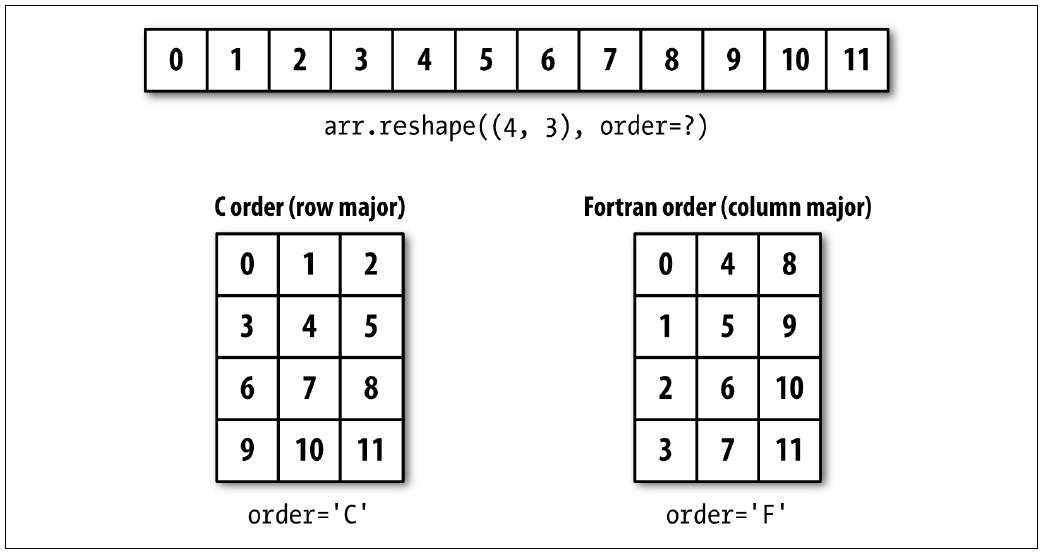

Uma matriz multidimensional também pode ser remodelada!

In [182]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

Uma das dimensões da forma passada pode ser -1, caso em que o valor usado para aquele
dimensão será inferida dos dados:

In [183]:
arr = np.arange(15)

In [186]:
# -1 faz com que o reshape ajuste o número de linhas ou colunas de acordo com os dados
arr.reshape((-1, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Uma vez que o atributo **shape** de uma matriz é uma tupla, ele pode ser passado para **reshape**

In [187]:
other_arr = np.ones((3, 5))

In [188]:
other_arr.shape

(3, 5)

In [189]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

A operação oposta de **reshape** de uma dimensão para uma dimensão superior é
normalmente conhecido como achatamento

In [190]:
arr = np.arange(15).reshape((5, 3))

In [191]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [192]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

**ravel** não produz uma cópia dos valores subjacentes se os valores no resultado
eram contíguos na matriz original. O método **flatten** se comporta como **ravel**, exceto
ele sempre retorna uma cópia dos dados:

In [193]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### ravel *vs* flatten

__*ravel*__
- Retorna apenas a referência / visualização da matriz original
- Se você modificar o array, notará que o valor do array original também muda.
- **ravel** é mais rápido do que **flatten** porque não ocupa memória.

__*flatten*__
- Retorna cópia da matriz original
- Se você modificar qualquer valor deste array, o valor do array original não é afetado.
- **flatten** é comparativamente mais lento que **ravel** porque ocupa memória.

Funções como **reshape** e **ravel** aceitam um argumento de ordem indicando a ordem para
dos dados na matriz. 
- Isso geralmente é definido como 'C' ou 'F' na maioria dos casos (também há opções menos utilizadas 'A' e 'K'; veja a documentação do NumPy.

In [194]:
arr = np.arange(12).reshape((3, 4))

In [195]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [196]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [197]:
arr.ravel('F')

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

#### Concatenando e dividindo matrizes

**numpy.concatenate** pega uma sequência (tupla, lista, etc.) de matrizes e as junta
em ordem ao longo do eixo determinado.

In [198]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])

In [199]:
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [200]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [201]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

Existem algumas funções de conveniência, como vstack e hstack, para tipos comuns de
concatenação. As operações anteriores poderiam ter sido expressas como:

In [202]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [203]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

a divisão, **split** por outro lado, divide uma matriz em várias matrizes ao longo de um eixo:

In [204]:
arr = np.random.randn(5, 2)

In [205]:
arr

array([[ 0.2212299 , -0.22191226],
       [ 2.2546381 ,  0.83293551],
       [ 0.4025413 ,  1.59202131],
       [ 0.79906509, -1.12469378],
       [-2.13882131, -1.30218001]])

In [206]:
first, second, third = np.split(arr, [1, 3])

In [207]:
first

array([[ 0.2212299 , -0.22191226]])

In [208]:
second

array([[2.2546381 , 0.83293551],
       [0.4025413 , 1.59202131]])

In [209]:
third

array([[ 0.79906509, -1.12469378],
       [-2.13882131, -1.30218001]])

O valor **`[1, 3]`** passado para **np.split** indica os índices nos quais dividir a matriz
em pedaços.

Funções de concatenação e divisão

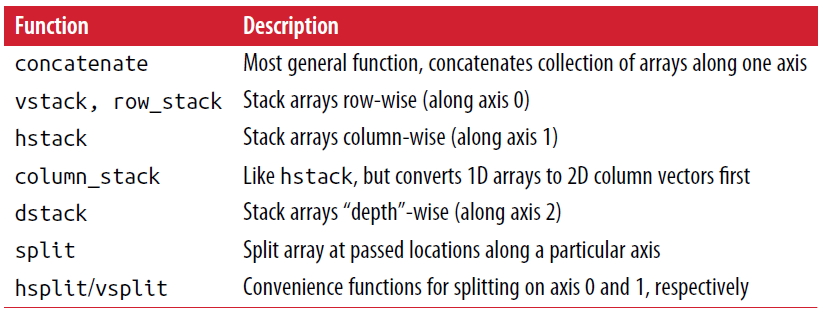

#### Elementos de repetição

Duas ferramentas úteis para repetir ou replicar matrizes para produzir matrizes maiores são as
funções de **tile** e **repeat**. **repeat** replica cada elemento em uma matriz, algum número
muitas vezes, produzindo uma matriz maior:

In [210]:
arr = np.arange(3)

In [211]:
arr

array([0, 1, 2])

In [212]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

Por padrão, se você passar um número inteiro, cada elemento será repetido esse número de vezes.
Se você passar uma matriz de inteiros, cada elemento pode ser repetido um número diferente de
vezes:

In [213]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

Matrizes multidimensionais podem ter seus elementos repetidos ao longo de um eixo específico.

In [214]:
arr = np.random.randn(2, 2)

In [215]:
arr

array([[-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711]])

In [216]:
arr.repeat(2, axis=0)

array([[-0.42879353, -1.15617737],
       [-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711],
       [ 0.48087245, -2.17111711]])

Observe que se nenhum eixo for passado, a matriz será achatada primeiro, o que provavelmente não você quer. Da mesma forma, você pode passar uma matriz de inteiros ao repetir um
array para repetir uma determinada fatia um número diferente de vezes:

In [217]:
arr.repeat([2, 3], axis=0)

array([[-0.42879353, -1.15617737],
       [-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711],
       [ 0.48087245, -2.17111711],
       [ 0.48087245, -2.17111711]])

In [218]:
arr.repeat([2, 3], axis=1)

array([[-0.42879353, -0.42879353, -1.15617737, -1.15617737, -1.15617737],
       [ 0.48087245,  0.48087245, -2.17111711, -2.17111711, -2.17111711]])

**tile**, por outro lado, é um atalho para empilhar cópias de uma matriz ao longo de um eixo.

In [219]:
arr

array([[-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711]])

In [220]:
np.tile(arr, 2)

array([[-0.42879353, -1.15617737, -0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711,  0.48087245, -2.17111711]])

O segundo argumento é o número de **tiles**; com um escalar, a repetição é feita linha por
linha, em vez de coluna por coluna. O segundo argumento para **tile** pode ser uma tupla
indicando o layout:

In [221]:
arr

array([[-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711]])

In [222]:
np.tile(arr, (2, 1))

array([[-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711],
       [-0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711]])

In [223]:
np.tile(arr, (3, 2))

array([[-0.42879353, -1.15617737, -0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711,  0.48087245, -2.17111711],
       [-0.42879353, -1.15617737, -0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711,  0.48087245, -2.17111711],
       [-0.42879353, -1.15617737, -0.42879353, -1.15617737],
       [ 0.48087245, -2.17111711,  0.48087245, -2.17111711]])

### Indexação elegante: *take* e *put*

Uma maneira de obter e definir subconjuntos de arrays é a indexação elegante usando matrizes inteiras:

In [226]:
arr = np.arange(10) * 100

In [227]:
inds = [7, 1, 2, 6]

In [228]:
arr[inds]

array([700, 100, 200, 600])

Existem métodos alternativos de **ndarray** que são úteis no caso especial de apenas fazer
a seleção em um único eixo:

In [229]:
arr.take(inds)

array([700, 100, 200, 600])

In [230]:
arr.put(inds, 42)

In [231]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [232]:
arr.put(inds, [40, 41, 42, 43])

In [233]:
arr

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

Para usar **take** em outros eixos, você pode passar a palavra-chave **axis**

In [234]:
inds = [2, 0, 2, 1]

In [235]:
arr = np.random.randn(2, 4)

In [236]:
arr

array([[-0.95443405, -2.35255048, -1.20566087,  0.04300838],
       [ 0.15183736,  3.14022792, -0.64467598, -0.54883486]])

In [237]:
arr.take(inds, axis=1)

array([[-1.20566087, -0.95443405, -1.20566087, -2.35255048],
       [-0.64467598,  0.15183736, -0.64467598,  3.14022792]])

## Broadcasting

[*Broadcasting*](https://numpy.org/doc/stable/user/basics.broadcasting.html) descreve como a aritmética funciona entre matrizes de diferentes formatos. 
Esse pode ser um recurso poderoso, mas que pode causar confusão. 
O exemplo mais simples de *broadcasting* ocorre ao combinar um valor escalar
com uma matriz:

In [238]:
arr = np.arange(5)

In [239]:
arr

array([0, 1, 2, 3, 4])

In [240]:
arr * 4

array([ 0,  4,  8, 12, 16])

Aqui dizemos que o valor escalar 4 foi transmitido a todos os outros elementos da
a operação de multiplicação.
Por exemplo, podemos subtrair cada coluna pela média. Nesse caso, é muito simples:

In [243]:
arr = np.random.randn(4, 3)

In [244]:
arr.mean(0)

array([-0.94755938,  0.30108142,  0.33890145])

In [245]:
demeaned = arr - arr.mean(0)

In [246]:
demeaned

array([[-0.05947879,  0.67553208,  0.92008618],
       [ 0.27472799, -1.20979752, -0.40901525],
       [-0.7173767 ,  0.60394334, -0.41891428],
       [ 0.5021275 , -0.06967789, -0.09215666]])

In [247]:
demeaned.mean(0)

array([ 5.55111512e-17,  2.08166817e-17, -5.55111512e-17])

### A regra de *broadcasting*

Duas matrizes são compatíveis para *broadcasting* se para cada dimensão de transmissão os comprimentos dos eixos correspondem ou se qualquer um dos comprimentos for 1. 
- A transmissão ocorre sobre as dimensões ausentes ou de comprimento 1.

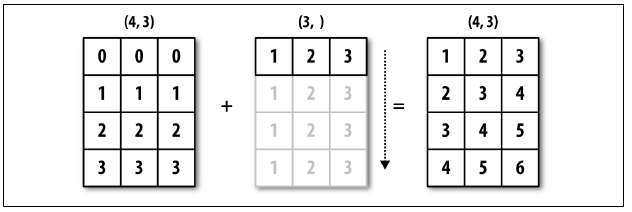

Considere o último exemplo e suponha que em vez disso, desejamos subtrair o valor médio de cada linha. 
- Como **arr.mean(0)** tem comprimento 3, é compatível para transmissão no eixo 0 porque a dimensão de transmissão em **arr** é 3 e, portanto, corresponde. De acordo com as regras, para subtrair do eixo 1 (ou seja, subtrair a média da linha de cada linha), a menor matriz deve ter forma a (4, 1):

In [248]:
arr

array([[-1.00703817,  0.9766135 ,  1.25898763],
       [-0.67283139, -0.9087161 , -0.0701138 ],
       [-1.66493608,  0.90502476, -0.08001283],
       [-0.44543188,  0.23140353,  0.24674479]])

In [249]:
row_means = arr.mean(1)

In [250]:
row_means

array([ 0.40952099, -0.55055377, -0.27997472,  0.01090548])

In [251]:
row_means.shape

(4,)

In [252]:
row_means.reshape((4, 1))

array([[ 0.40952099],
       [-0.55055377],
       [-0.27997472],
       [ 0.01090548]])

In [253]:
demeaned = arr - row_means.reshape((4, 1))

In [254]:
demeaned.mean(1)

array([ 7.40148683e-17,  3.70074342e-17, -1.85037171e-17, -9.25185854e-18])

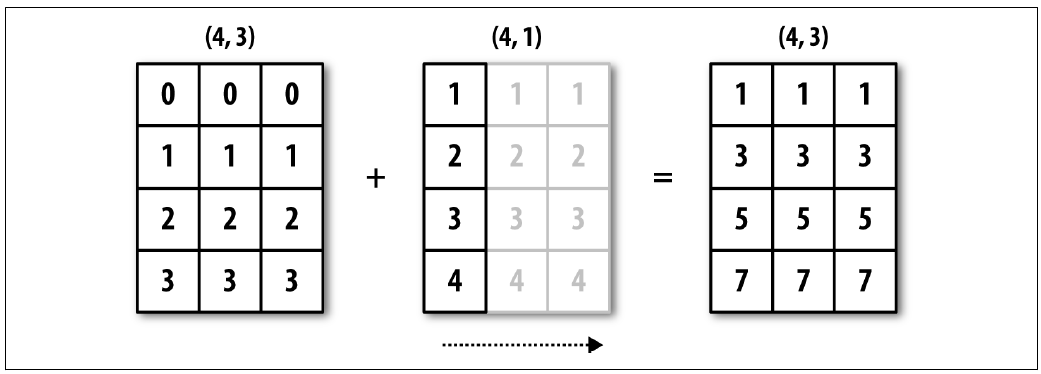